# Gráficos para series temporales en Matplotlib

In [2]:
# Librerias
import time
import datetime
import numpy as np
import pandas as pd
import seaborn as sns

# Cargamos la base de datos completa
df = pd.read_csv('C:/Users/G/Documents/dataset/base_datos_2008.csv')
# Creamos un subset de 3 ciudades
df2 = df[ df['Origin'].isin(['ATL', 'HOU', 'IND'])]
# subset
df = df.head(500000)


In [5]:
# Preprocesamiento de datos 
# Lista vacia
times = []

# Iterando por los index del dataframe
for i in np.arange(len(df)):
    # Extendemos la lista, aplicando la funcion de tiempo que depende de los parametros (año, mes y dia del mes)
    times.append( datetime.datetime(year = 2008, month = df.loc[i, 'Month'], day = df.loc[i, 'DayofMonth']))

In [6]:
# Mostramos el elemento 50000 de la lista 
times[50000]

datetime.datetime(2008, 1, 18, 0, 0)

In [7]:
# Agregamos la lista al dataframe como nueva columna
df['Time'] = times

In [8]:

data = df.groupby( by = ['Time'], as_index = False)['DepDelay', 'ArrDelay'].mean()
data.head()

C:\Users\G\AppData\Local\Temp\ipykernel_15260\2277532398.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df.groupby( by = ['Time'], as_index = False)['DepDelay', 'ArrDelay'].mean()


,Time,DepDelay,ArrDelay
0,2008-01-01,20.545599,20.999240
1,2008-01-02,23.324222,22.131194
2,2008-01-03,16.697759,14.479569
3,2008-01-04,14.058087,11.851733
4,2008-01-05,18.381555,17.138031


<AxesSubplot:xlabel='Time', ylabel='DepDelay'>

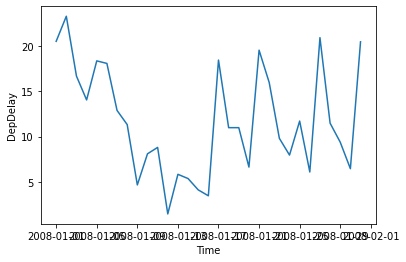

In [10]:
# Grafico de retrasos con fecha 
sns.lineplot(x = data['Time'], y = data['DepDelay'])

In [11]:
# Datos sin el indice forzado 
data = df.groupby( by = ['Time'])['DepDelay', 'ArrDelay'].mean()
data.head()

C:\Users\G\AppData\Local\Temp\ipykernel_15260\3065018425.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df.groupby( by = ['Time'])['DepDelay', 'ArrDelay'].mean()


,DepDelay,ArrDelay
Time,,
2008-01-01,20.545599,20.999240
2008-01-02,23.324222,22.131194
2008-01-03,16.697759,14.479569
2008-01-04,14.058087,11.851733
2008-01-05,18.381555,17.138031


<AxesSubplot:xlabel='Time'>

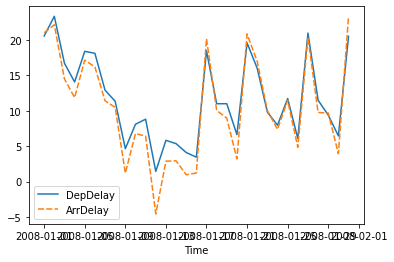

In [12]:
sns.lineplot(data=data)

In [13]:
times = []

for i in df2.index:
    times.append( datetime.datetime( year=2008, month= df2.loc[i, 'Month'], day = df2.loc[i, 'DayofMonth']))

df2['time'] =times

<AxesSubplot:xlabel='time', ylabel='ArrDelay'>

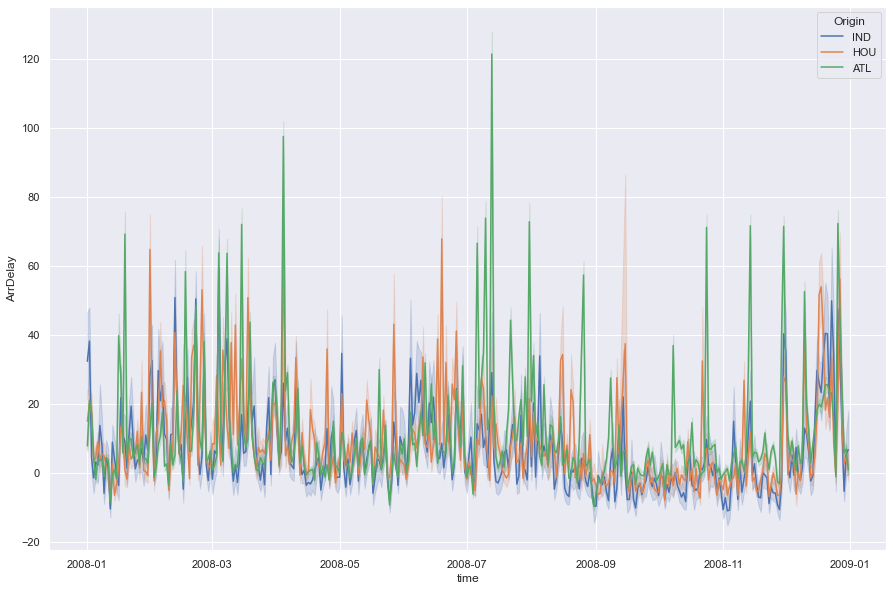

In [16]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.lineplot(x = 'time', y = 'ArrDelay', hue = 'Origin', data = df2)